In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.datasets import load_sample_image
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score

from scipy.stats import mode

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

In [3]:
km = KMeans(n_clusters=10)

predict = km.fit_predict(X)

In [4]:
labels = np.zeros_like(predict)
for i in range(10):
    mask = (predict==i)
    labels[mask] = mode(y[mask])[0]   

In [5]:
print "Accuracy Score: ", accuracy_score(y,labels)
print "\nConfusion Matrix: \n", confusion_matrix(y, labels)

Accuracy Score:  0.791875347802

Confusion Matrix: 
[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 163   0   0   8   3   0]
 [  0   0   0   2   2 136   1   0   0  41]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   0   0 175   2   0]
 [  0   5   3   2   0   4   2   5 100  53]
 [  0  20   0   7   0   6   0   7   2 138]]


## Image

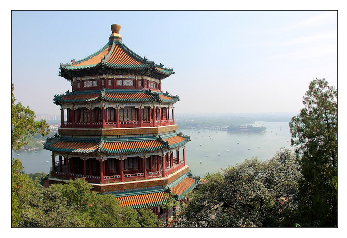

In [6]:
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [7]:
china.shape

(427L, 640L, 3L)

In [8]:
x, y, z = china.shape
china_2d = china.reshape(x*y, z)
china_2d.shape

(273280L, 3L)

In [9]:
kmeans_cluster = KMeans(n_clusters=7)
kmeans_cluster.fit(china_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

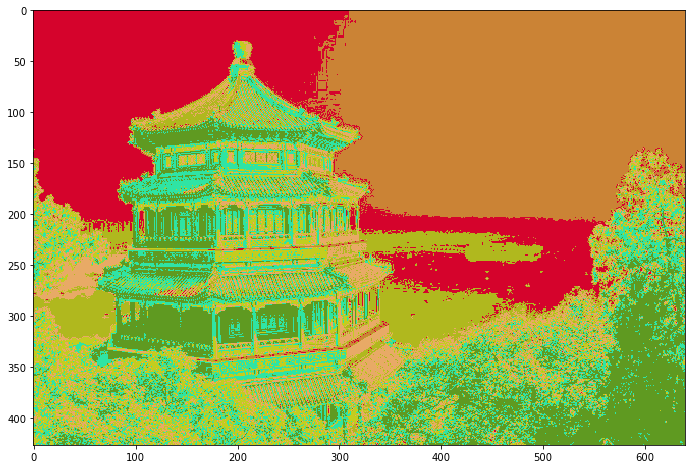

In [10]:
plt.figure(figsize = (15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x, y, z));